In [2]:
%matplotlib inline
import torch
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

/opt/conda/envs/d2lenv/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/envs/d2lenv/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
f(3)

15

In [4]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=0.08262
h=0.01000, numerical limit=0.11582
h=0.00100, numerical limit=0.11919
h=0.00010, numerical limit=0.11953
h=0.00001, numerical limit=0.11956


In [5]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

In [6]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [7]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [8]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

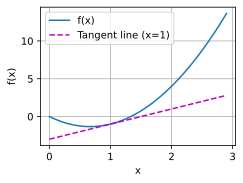

In [9]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

/tmp/ipykernel_2564/763168213.py:2: RuntimeWarning: divide by zero encountered in divide
  return x ** 3 - 1/x


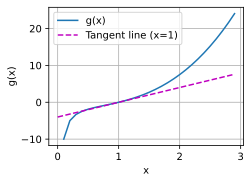

In [12]:
def g(x):
    return x ** 3 - 1/x
x = np.arange(0, 3, 0.1)
plot(x, [g(x), 4*x - 4], 'x', 'g(x)', legend=['g(x)', 'Tangent line (x=1)'])

-0.42884397268429136
0.1268575858683853
0.04288439726842914
0.16974198313681443
0.16974198313681446


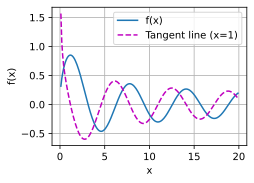

In [ ]:
import math
def f(x):
    return x**2 * 

def df(x):
    return (np.cos(x) * x**(1/2) - 0.5 * np.sin(x) / x**(1/2)) / x

def dsin(x):
    return np.cos(x)

def dsqrt(x):
    return 0.5 / x**(1/2)

def dfdy(x):
    return dsin(x) / (x**(1/2)) 

def dfdg(x):
    return - np.sin(x)/x * dsqrt(x) 



delta = 0.0000001
print(f(5))

print(dfdy(5))
print(dfdg(5))
print(dfdy(5)+dfdg(5))
print(df(5))
x = np.arange(0.1, 20, 0.1)
plot(x, [f(x), df(x)], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

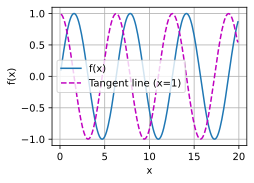

In [153]:
import math
def f(x):
    return np.sin(x)

def df(f, x):
    y = f(x)
    dy_dx = np.gradient(y, x)  # Numerical derivative
      # 计算y对x的梯度
    return dy_dx  # 返回梯度




x = np.arange(0.1, 20, 0.1)

plot(x, [f(x), df(f, x)], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [159]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [161]:

x.requires_grad_(True)  # 设置x为需要梯度计算的变量
print(x.grad)  # x的梯度为None，因为还没有进行反向传播
y =  torch.dot(x, x)
print(y)
y.backward()  # 计算y对x的梯度
print(x.grad)  # 输出x的梯度
print(x.grad == 2 * x)  # 验证梯度是否正确
x.grad.zero_()  # 清除梯度

None
tensor(14., grad_fn=<DotBackward0>)
tensor([0., 2., 4., 6.])
tensor([True, True, True, True])


tensor([0., 0., 0., 0.])

In [162]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [170]:
x.grad.zero_()
y = x * x
print(y.shape)
# 等价于y.backward(torch.ones(len(x)))
print(torch.ones(len(x)))
y.backward(torch.ones(len(x)))
x.grad

torch.Size([4])
tensor([1., 1., 1., 1.])


tensor([0., 2., 4., 6.])

In [171]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [174]:
a = torch.randn(size=((2,2)), requires_grad=True)
print(a)
d = f(a)
print(d)
d.backward(torch.ones_like(d))

tensor([[-0.0562, -2.2604],
        [-0.1224, -0.1683]], requires_grad=True)
tensor([[  -2879.0044, -115734.0000],
        [  -6268.9302,   -8617.3428]], grad_fn=<MulBackward0>)


In [126]:
a.grad == d / a

tensor(True)